# Multi variable linear regression model

In [182]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/weatherHistory.csv').head(5)
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5 non-null      object 
 1   Summary                   5 non-null      object 
 2   Precip Type               5 non-null      object 
 3   Temperature (C)           5 non-null      float64
 4   Apparent Temperature (C)  5 non-null      float64
 5   Humidity                  5 non-null      float64
 6   Wind Speed (km/h)         5 non-null      float64
 7   Wind Bearing (degrees)    5 non-null      float64
 8   Visibility (km)           5 non-null      float64
 9   Loud Cover                5 non-null      float64
 10  Pressure (millibars)      5 non-null      float64
 11  Daily Summary             5 non-null      object 
dtypes: float64(8), object(4)
memory usage: 608.0+ bytes


- extract the features into arrays.

In [166]:
x_train = np.array([data['Pressure (millibars)'], data["Humidity"], data['Wind Speed (km/h)']]).transpose() #features
y_train = np.array(data['Temperature (C)']) # target 

In [167]:
print(f"X {x_train.shape} and the type of this data is {type(x_train)}")
print(x_train)

X (5, 3) and the type of this data is <class 'numpy.ndarray'>
[[1.01513e+03 8.90000e-01 1.41197e+01]
 [1.01563e+03 8.60000e-01 1.42646e+01]
 [1.01594e+03 8.90000e-01 3.92840e+00]
 [1.01641e+03 8.30000e-01 1.41036e+01]
 [1.01651e+03 8.30000e-01 1.10446e+01]]


In [168]:
x_train.shape

(5, 3)

In [74]:
y_train.transpose()

array([9.47222222, 9.35555556, 9.37777778, 8.28888889, 8.75555556])

In [128]:
# X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
# y_train = np.array([460, 232, 178])

### Initializing __w__ and __b__ vectors

In [170]:
w = np.zeros(x_train.shape[1])
b = 0
w

array([0., 0., 0.])

- to predict the value of `x[i]` we will have to use the vector dot.

In [171]:
def predict(x_feature, w, b):
    vector = np.dot(x_feature, w)
    return vector + b

In [146]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

### Computing the cost function using a vector of features

In [172]:
def cost_function(x_features,y_target, w, b):
    cost =0.0
    m = x_features.shape[0]
    for i in range(m):
        f_wb_i = np.dot(x_features[i], w) +b
        cost = cost + (f_wb_i - y_target[i])**2
    return cost / (2 * m)

In [173]:
cost_function(X_train, y_train, w_init, b_init)

44.19868827160494

### Computing the gradient

In [174]:
def compute_gradient(x_train,y_train, w,b):
    m,n = x_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        square = (np.dot(x_train[i], w) +b) - y_train[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (square * x_train[i,j] )
        dj_db = dj_db + square
    dj_db = dj_db /m 
    dj_dw = dj_dw /m
    return dj_db, dj_dw


In [175]:
db, dw = compute_gradient(X_train, y_train, w_init,b_init)
print(f"The derivative of j with respect to w : {dw}")
print(f"The derivative of j with respect to b : {db}")

The derivative of j with respect to w : [-1.37222963e+04 -3.13944444e+01 -1.25203704e+01 -3.76231481e+02]
The derivative of j with respect to b : -9.401851851851852


### Gradient descent with multiple variables

In [176]:
def gradient_descent(x_train,y_train,alpha,iterations,compute_cost,compute_gradient,w,b):
    
    j_history = []
    grad_history = []
    
    m,n = x_train.shape
    for i in range(iterations):
        
        dj_db, dj_dw = compute_gradient(x_train, y_train, w , b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            j_history.append(compute_cost(x_train,y_train, w, b))
            grad_history.append([w,b])
        if i % math.ceil(iterations/ 10) == 0 :
            print(f"Iteration {i} - Cost {j_history[-1]}")
    return w, b, j_history, grad_history


- Running gradient descent on the weather dataset.

In [180]:
w_init = np.zeros((x_train.shape[1]))
b_init = 0.0
alpha = 5.0e-7
num_iter = 10000
pred_w, pred_b, j_hist, grad_hist = gradient_descent(x_train, y_train,alpha, num_iter,cost_function,compute_gradient,w_init,b_init)
print(f"Predicted value of w is : {pred_w}")
print(f"Predicted value of b is : {pred_b:0.2f}")

Iteration 0 - Cost 9.69426937942513
Iteration 1000 - Cost 0.10616776600331737
Iteration 2000 - Cost 0.1060591630653001
Iteration 3000 - Cost 0.10595225876064662
Iteration 4000 - Cost 0.1058470265095689
Iteration 5000 - Cost 0.10574344014819359
Iteration 6000 - Cost 0.10564147392205239
Iteration 7000 - Cost 0.10554110247967655
Iteration 8000 - Cost 0.10544230086629054
Iteration 9000 - Cost 0.10534504451760532
Predicted value of w is : [ 8.93239018e-03  6.28260074e-05 -2.16588693e-03]
Predicted value of b is : 0.00


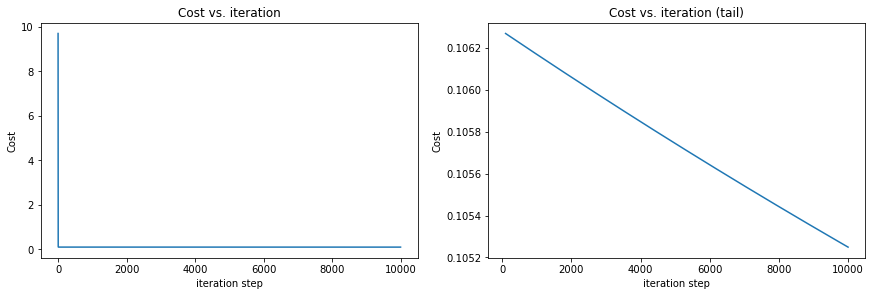

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_hist)
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()